In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [4]:
df = pd.read_csv("palmer_penguins.csv")

In [8]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [10]:
# preprocessing to get our labels
y = df.iloc[0:220].species.values
y = np.where(y == "Adelie", -1, 1)

X = df[["bill_length_mm", "bill_depth_mm"]].iloc[:220].values

# deleting instances where where we don't have both bill measurements
deleted_instances = []
for row in range(X.shape[0]):
    if np.isnan(np.sum(X[row, :])):
        deleted_instances.append(row)

X = np.delete(X, deleted_instances, axis = 0) # removing desired instances
y = np.delete(y, deleted_instances) # deleting the label associated with the removed instances 

In [266]:
class Perceptron():
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1]) # creating a random weight vector for neuron initialization
        
        self.errors_ = [] # a list that will contain the misclassification errors we obtain while training
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi # updating the weights
                self.w_[-1] -= update # updating the bias
                errors += int(update != 0)
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1] # the weighted sum/input signal
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
        

In [267]:
percep = Perceptron(epochs = 1_000)
percep.train(X, y)

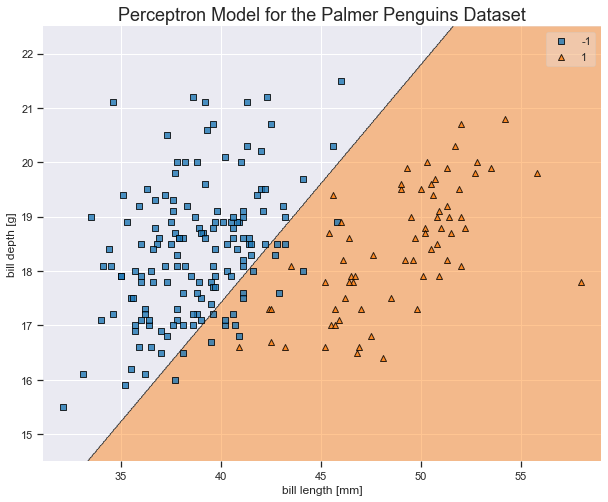

In [268]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron Model for the Palmer Penguins Dataset", fontsize = 18)
plt.xlabel("bill length [mm]")
plt.ylabel("bill depth [g]")
plt.show()

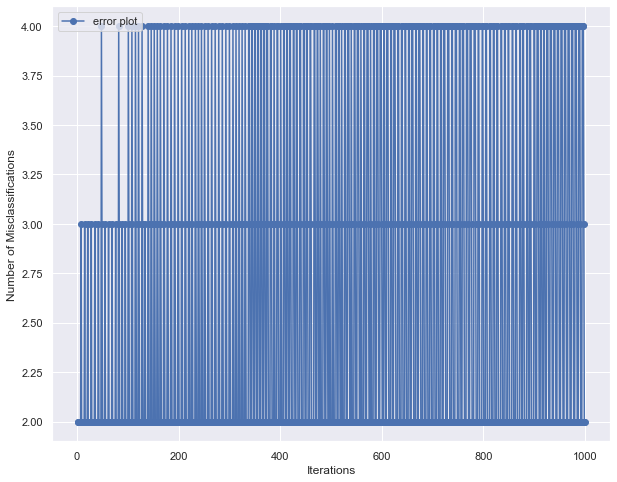

In [269]:
plt.figure(figsize = (10, 8))
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassifications")
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker = "o", label = "error plot")
plt.legend()
plt.show()